<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# **Artificial Intelligence - MSc**

## CS6462 - PROBABILISTIC AND EXPLAINABLE AI
## SEM2 2024/5

### CS6462 Assignment 2 - Bayesian Networks, ML with Python

### Instructor: Emil Vassev
March 13th, 2025
<br><br>
Copyright (C) 2025 - All rights reserved, do not copy or distribute without permission of the author.
***

## Submission Info
### Student Name: <span style="color:red">Yuanyuan Chen</span>
### Student Surname: <span style="color:red">Chen</span>
### Student ID: <span style="color:red">24026719</span>
### Date of Final Submission: <span style="color:red">April 06</span>
***

# Task #1: Bayesian Networks (50%)

In this e-tivity, you are asked to build a Bayesian Network by following the steps outlined in “**Notebook Lesson: Building Bayesian Networks with Python**”. This Bayesian Network needs to cover a real-life scenario, which is a modified version of the “Recommendation Letter” example provided by the lectures.
## The real-life scenario
Let’s suppose that a UL student is taking the CS6264 module “Probabilistic and Explainable AI”. The student’s grade for this module will depend on their intelligence (low or high), module difficulty (easy, hard), and their health status (sick or healthy). Our student asks their professor for a recommendation letter. To come up with the idea of the quality of that recommendation letter (weak or strong), the professor can only look at the student’s grade (A, B or C) and the student’s forum activity (not active, moderate or active). Hence, the actual quality of the letter depends stochastically on the grade and on the forum activity.

### Here are the steps you need to follow:

## Step 1: Create the DAG of the Bayesian Network (10%)

### Step 1.1. Describe the problem (2%)
Outline the problem in terms of:
<ul>
<li>random variables and their domain</li>
<li>dependencies among these random variables</li>
<ul>



*   random variables and their domain
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Random Variables and Their Domains</title>
</head>
<body>

<h1>Random Variables and Their Domains</h1>

<table border="1">
    <thead>
        <tr>
            <th>Random Variable</th>
            <th>Domain (Possible Values)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Intelligence</td>
            <td>{Low, High}</td>
        </tr>
        <tr>
            <td>Difficulty</td>
            <td>{Easy, Hard}</td>
        </tr>
        <tr>
            <td>Health</td>
            <td>{Sick, Healthy}</td>
        </tr>
        <tr>
            <td>Grade</td>
            <td>{A, B, C}</td>
        </tr>
        <tr>
            <td>ForumActivity</td>
            <td>{Not Active, Moderate, Active}</td>
        </tr>
        <tr>
            <td>LetterQuality</td>
            <td>{Weak, Strong}</td>
        </tr>
    </tbody>
</table>

</body>
</html>




*   dependencies among these random variables
  - The student’s Grade depends on their Intelligence, the Difficulty of the module, and their Health.

  - The quality of the Recommendation Letter depends on the Grade and the level of Forum Activity.
    - Grade ← Student Intelligence
    - Grade ← Course Difficulty
    - Grade ← Health Status
    - Recommendation ← Grade
    - Recommendation ← Forum Activity




### Step 1.2. Draw and show the DAG (2%)

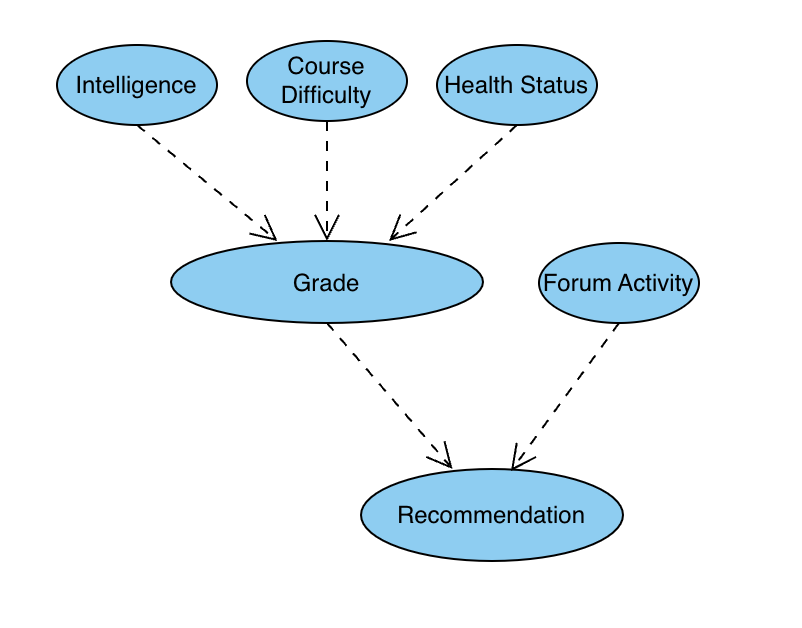

In [7]:
# your code goes here
from IPython.display import Image

Image("/content/Screenshot 2025-04-06 at 08.32.15.png", width=600, height=400)

### Step 1.3. Create the DAG of the Bayesian Network by using the pgmpy library (5%)

In [7]:
# your code goes here
!pip install daft==0.1.2

In [4]:
!pip install pgmpy==0.1.26

  Using cached pgmpy-0.1.26-py3-none-any.whl.metadata (9.1 kB)
Using cached pgmpy-0.1.26-py3-none-any.whl (2.0 MB)
  Attempting uninstall: pgmpy
    Found existing installation: pgmpy 1.0.0
    Uninstalling pgmpy-1.0.0:
      Successfully uninstalled pgmpy-1.0.0


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork

#create Bayes Network
model = BayesianNetwork([
    ('Intelligence', 'Grade'),
    ('Difficulty', 'Grade'),
    ('Health', 'Grade'),
    ('Grade', 'LetterQuality'),
    ('ForumActivity', 'LetterQuality')
])

### Step 1.4. Show the DAG of the Bayesian Network (1%)

<Axes: >

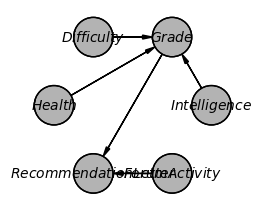

In [9]:
# your code goes here
model_daft = model.to_daft()
model_daft.render()

## Step 2: Create the Conditional Probability Distributions of the Bayesian Network (25%)

### Step 2.1: Build the probability distribution tables with TabularCPD (22%)

In [5]:
from pgmpy.factors.discrete import TabularCPD
cpd_intelligence = TabularCPD(variable='Intelligence',
                              variable_card=2,
                              values=[[0.4],  # Low
                                      [0.6]])  # High

# Difficulty CPD
cpd_difficulty = TabularCPD(variable='Difficulty',
                             variable_card=2,
                             values=[[0.5],  # Easy
                                     [0.5]])  # Hard

# Health CPD
cpd_health = TabularCPD(variable='Health',
                        variable_card=2,
                        values=[[0.1],  # Sick
                                [0.9]])  # Healthy

# Forum Activity{not active, moderate ，active}
cpd_forum_activity = TabularCPD (
    variable="ForumActivity",
    variable_card=3,
    values=[[0.2], [0.6],[0.2]]
)
# Grade CPD
cpd_grade = TabularCPD(variable='Grade',
                       variable_card=3,  # A, B, C
                       values=[[0.1, 0.2, 0.7, 0.5, 0.3, 0.4, 0.6, 0.2],  # P(A)
                               [0.3, 0.4, 0.2, 0.3, 0.4, 0.2, 0.2, 0.3],  # P(B)
                               [0.6, 0.4, 0.1, 0.2, 0.3, 0.4, 0.2, 0.5]],  # P(C)
                       evidence=['Intelligence', 'Difficulty', 'Health'],
                       evidence_card=[2, 2, 2])  # 2个父变量状态

# LetterQuality CPD
cpd_letter_quality = TabularCPD(variable='LetterQuality',
                                 variable_card=2,  # Weak, Strong
                                 values=[[0.7, 0.2, 0.4, 0.1, 0.6, 0.3, 0.5, 0.4, 0.2],  # Weak
                                         [0.3, 0.8, 0.6, 0.9, 0.4, 0.7, 0.5, 0.6, 0.8]],  # Strong
                                 evidence=['Grade', 'ForumActivity'],
                                 evidence_card=[3, 3])  # 3个父变量状态


### Step 2.2: Associate the distribution models with the network structure (2%)

In [6]:
# Add CPDs to the model

model.add_cpds(cpd_intelligence, cpd_difficulty, cpd_health, cpd_grade,cpd_forum_activity, cpd_letter_quality)

### Step 2.3: Check the model (1%)

In [7]:
# your code goes here
# Check if the model is valid
model.check_model()
print("Model and CPDs added successfully!")

Model and CPDs added successfully!


## Step 3: Inference with the Bayesian Network (15%)

### Step 3.1: Infer Posterior Probability of having a grade A if the evidence is a strong recommendation letter (5%)

In [8]:
# your code goes here
from pgmpy.inference import VariableElimination

# 进行推断
infer = VariableElimination(model)
posterior_p = infer.query(['Grade'], evidence={'LetterQuality': 1})  # 查询Grade，给定LetterQuality的证据


In [9]:
# show the posterior probability results
# your code goes here
print(posterior_p)

+----------+--------------+
| Grade    |   phi(Grade) |
+==========+==============+
| Grade(0) |       0.3547 |
+----------+--------------+
| Grade(1) |       0.2628 |
+----------+--------------+
| Grade(2) |       0.3825 |
+----------+--------------+


### Step 3.2: Infer Prior Probability of having a strong recommendation letter (no evidence) (5%)

In [10]:
# your code goes here
prior_p = infer.query(['LetterQuality'], evidence={})

In [11]:
# show the prior probability results
# your code goes here
print(prior_p)

+------------------+----------------------+
| LetterQuality    |   phi(LetterQuality) |
+==================+======================+
| LetterQuality(0) |               0.3841 |
+------------------+----------------------+
| LetterQuality(1) |               0.6159 |
+------------------+----------------------+


### Step 3.3: Infer Prior Probability of having a strong recommendation letter with a weak forum activity as a prior evidence (5%)

In [12]:
# your code goes here
prior_p = infer.query(['LetterQuality'], evidence={'ForumActivity': 0})

In [13]:
# show the prior probability results
# your code goes here
print(prior_p)

+------------------+----------------------+
| LetterQuality    |   phi(LetterQuality) |
+==================+======================+
| LetterQuality(0) |               0.4506 |
+------------------+----------------------+
| LetterQuality(1) |               0.5494 |
+------------------+----------------------+


# Task #2: Machine Learning with Python (50%)

In this task, you are asked to follow the ML process to:

* preprocess a provided dataset, so it will become suitable for ML operations;
* select an appropriate ML model, so it will cope with the specifics of data and ML tasks;
* train the selected ML model on the preprocessed dataset;
* test the selected ML model on the preprocessed dataset.

Please, consult the "**Notebook Lesson: Machine Learning with Python**" for the specifics of the different ML models, the Data Preprocessing staeps and the specifics of Model Training and Testing.

## The Dataset
The provided dataset covers bond trading operations (buy and sell) on a financial market. The data is labeled and provided in its raw format, so it needs to be preprocessed.

The provided dataset can be loaded as following:

In [14]:
import pandas as pd

url_dataset = "https://raw.githubusercontent.com/evassev/ET5003_SEM1_2022/main/Etivities/data/trade_combined.csv"
df = pd.read_csv(url_dataset)

df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
0,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,334,10792.0,6549,129,D,13,5,OUTRIGHT
1,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,335,117793.0,6549,129,D,13,5,OUTRIGHT
2,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,325,119290.0,6549,129,D,13,5,OUTRIGHT
3,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,327,113852.0,6549,129,D,13,5,OUTRIGHT
4,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,BUY,2400000,...,1,1,337,117795.0,6549,129,D,13,5,OUTRIGHT
5,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,325,119752.0,7019,277,D,13,4,OUTRIGHT
6,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,336,117794.0,7019,277,D,13,4,OUTRIGHT
7,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,323,117786.0,7019,277,D,13,4,OUTRIGHT
8,1,135087M76,WI,NaN,1,BOND,11/1/2023,8/9/2021 0:00,SELL,15000000,...,1,1,337,117795.0,7019,277,D,13,4,OUTRIGHT
9,1,135087L93,WI,NaN,1,BOND,9/1/2026,4/16/2021 0:00,SELL,600000,...,1,1,335,117793.0,11532,177,D,13,4,OUTRIGHT


## Target: In this task you are asked to predict the  <span style="color:red">Bond Price</span>.

## Note: In the following steps use the dataframe object <span style="color:red">df</span>.  

## Here are the steps you need to follow:

## Step 1: Determine the ML Model: Supervised-Classification, Supervised-Regression, or Unsupervised ML Model.  (5%)

<span style="color:red">TODO: your rationale goes here</span>

**Target**: the goal is to predict the "Bond Price." Since the target variable is continuous, this is a regression problem, not a classification problem.

**Reasons for model selection**:

Supervised learning:

The data set is annotated, i.e. we know the target value for each record (the "Price" column), so this is a supervised learning problem.

Return mission:

The task asks us to predict the price of a bond, and the price of a bond is a continuous number (not a categorical label). Therefore, this is a typical regression problem, not a classification problem.

Selection of regression model:

Since the prediction of bond prices involves continuous numerical output, we need to choose a supervised regression model.

Models such as RandomForestRegressor or LinearRegression can be used, both of which are suitable for regression tasks.

So the type of machine learning model for this task is Supervised Regression, because we need to predict a continuous numerical target (" Price ") based on the features provided.

## Step 2: Data Preprocessing.  (35%)

### Step 2.1: Specifics of the dataset.  (5%)
<span style="color:red">
    TODO: Show the specifics of the dataset in terms of:
    <ul>
    <li>shape</li>
    <li>columns (features)</li>
    <li>data types</li>
    <li>statistics for the 'Price' feature</li>
    <li>plot the 'Price' feature</li>
    </ul>    
</span>

Shape of the dataset: (20000, 27)
Columns and Data types:
NoRelatedSym          int64
Symbol               object
SymbolSfx            object
SecurityID          float64
SecurityIDSource      int64
SecurityType         object
MaturityDate         object
IssueDate            object
Side                 object
OrderQty              int64
SettlDate            object
Currency             object
OrdType               int64
TransactTime         object
Price               float64
PriceType             int64
Yield               float64
NoPartIDs             int64
PartyID               int64
DealerID              int64
DealerTraderID      float64
CustomerTraderID      int64
CustomerID            int64
PartyIDSource        object
PartyRole             int64
DealerCount           int64
OrdSubType           object
dtype: object

Statistics for 'Price' feature:
count    18692.000000
mean       107.535666
std         14.445474
min          0.000000
25%         99.749750
50%        103.324500
75%    

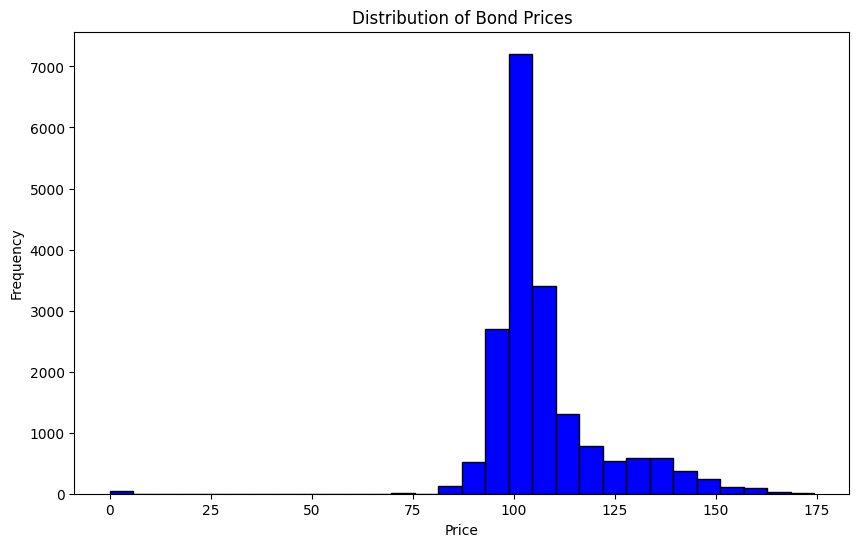

In [15]:
print("Shape of the dataset:", df.shape)

print("Columns and Data types:")
print(df.dtypes)

print("\nStatistics for 'Price' feature:")
print(df['Price'].describe())

plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Bond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Step 2.2: Data Cleaning: Remove features with unique values for each row in the dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with unique values for each row in the dataset.</li>
    <li>Remove the features with unique values for each row in the dataset.</li>
    </ul>    
</span>

In [16]:
unique_per_row_columns = [col for col in df.columns if df[col].nunique() == len(df)]
print("Features with unique values for each row:")
print(unique_per_row_columns)
df_cleaned = df.drop(columns=unique_per_row_columns)

# check the data after removing unique value
print("\nDataset after removing unique value columns:")
print(df_cleaned.head())

Features with unique values for each row:
[]

Dataset after removing unique value columns:
   NoRelatedSym     Symbol SymbolSfx  SecurityID  SecurityIDSource  \
0             1  135087L93        WI         NaN                 1   
1             1  135087L93        WI         NaN                 1   
2             1  135087L93        WI         NaN                 1   
3             1  135087L93        WI         NaN                 1   
4             1  135087L93        WI         NaN                 1   

  SecurityType MaturityDate       IssueDate Side  OrderQty  ... NoPartIDs  \
0         BOND     9/1/2026  4/16/2021 0:00  BUY   2400000  ...         1   
1         BOND     9/1/2026  4/16/2021 0:00  BUY   2400000  ...         1   
2         BOND     9/1/2026  4/16/2021 0:00  BUY   2400000  ...         1   
3         BOND     9/1/2026  4/16/2021 0:00  BUY   2400000  ...         1   
4         BOND     9/1/2026  4/16/2021 0:00  BUY   2400000  ...         1   

  PartyID  DealerID Deale

### Step 2.3: Data Cleaning: Remove features with one unique value for the entire dataset. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the features with one unique value for the entire dataset.</li>
    <li>Remove the features with one unique value for the entire dataset.</li>
    </ul>    
</span>

In [17]:
unique_value_columns = [col for col in df_cleaned.columns if df_cleaned[col].nunique() == 1]
print("Features with unique_value_columns for each row:")
print(unique_value_columns)
df_cleaned = df_cleaned.drop(columns=unique_value_columns)


print("\nDataset after removing unique value columns:")
print(df_cleaned.head())

Features with unique_value_columns for each row:
['NoRelatedSym', 'SymbolSfx', 'SecurityIDSource', 'Currency', 'OrdType', 'PriceType', 'NoPartIDs', 'PartyID', 'PartyIDSource', 'PartyRole', 'OrdSubType']

Dataset after removing unique value columns:
      Symbol  SecurityID SecurityType MaturityDate       IssueDate Side  \
0  135087L93         NaN         BOND     9/1/2026  4/16/2021 0:00  BUY   
1  135087L93         NaN         BOND     9/1/2026  4/16/2021 0:00  BUY   
2  135087L93         NaN         BOND     9/1/2026  4/16/2021 0:00  BUY   
3  135087L93         NaN         BOND     9/1/2026  4/16/2021 0:00  BUY   
4  135087L93         NaN         BOND     9/1/2026  4/16/2021 0:00  BUY   

   OrderQty   SettlDate TransactTime   Price  Yield  DealerID  DealerTraderID  \
0   2400000  12/16/2021     15:20:43     NaN    NaN       334         10792.0   
1   2400000  12/16/2021     15:20:43  98.720  1.281       335        117793.0   
2   2400000  12/16/2021     15:20:43  98.720  1.281      

### Step 2.4: Data Cleaning: Remove records with null (NAN) values. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show the number of null values per feature.</li>
    <li>For any feature, remove the rows containg a null value.</li>
    </ul>    
</span>

In [18]:
# 查看每个特征的空值数量
null_values = df.isnull().sum()
print("Number of null values per feature:")
print(null_values)

# 删除包含空值的行
df_cleaned = df.dropna()

# 确认删除后的数据集是否还有空值
print("\nAfter removing rows with null values, the number of null values per feature:")
print(df_cleaned.isnull().sum())


Number of null values per feature:
NoRelatedSym            0
Symbol                  0
SymbolSfx               0
SecurityID          13959
SecurityIDSource        0
SecurityType            0
MaturityDate            0
IssueDate               0
Side                    0
OrderQty                0
SettlDate               0
Currency                0
OrdType                 0
TransactTime            0
Price                1308
PriceType               0
Yield                1297
NoPartIDs               0
PartyID                 0
DealerID                0
DealerTraderID       1055
CustomerTraderID        0
CustomerID              0
PartyIDSource           0
PartyRole               0
DealerCount             0
OrdSubType              0
dtype: int64

After removing rows with null values, the number of null values per feature:
NoRelatedSym        0
Symbol              0
SymbolSfx           0
SecurityID          0
SecurityIDSource    0
SecurityType        0
MaturityDate        0
IssueDate         

### Step 2.5: Data Transformation: Convert all non-numeric features to numeric. (15%)
<span style="color:red">
    TODO:
    <ul>
    <li>Show all non-numeric features.</li>
    <li>Convert the non-numeric features to numeric.</li>
    </ul>    
</span>

In [23]:
from sklearn.preprocessing import LabelEncoder
non_numeric_features = df.select_dtypes(include=['object']).columns
print("Non-numeric features:")
print(non_numeric_features)

label_encoder = LabelEncoder()
for col in non_numeric_features:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

print(df_cleaned.head())

Non-numeric features:
Index([], dtype='object')
      NoRelatedSym  Symbol  SymbolSfx  SecurityID  SecurityIDSource  \
6204             1      58          0   1657312.0                 1   
6205             1      58          0   1657312.0                 1   
6206             1      77          0   1657313.0                 1   
6207             1      58          0   1657317.0                 1   
6208             1      58          0   1657317.0                 1   

      SecurityType  MaturityDate  IssueDate  Side  OrderQty  ...  NoPartIDs  \
6204             1            34        221     0   1000000  ...          1   
6205             1            34        221     0   1000000  ...          1   
6206             1           112        130     1   5000000  ...          1   
6207             1            34        221     0   1250000  ...          1   
6208             1            34        221     0   1250000  ...          1   

      PartyID  DealerID  DealerTraderID  CustomerT

## Step 3: Model Training and Testing.  (10%)

In [27]:
df.shape

(5685, 27)

In [28]:
df.head(10)

,NoRelatedSym,Symbol,SymbolSfx,SecurityID,SecurityIDSource,SecurityType,MaturityDate,IssueDate,Side,OrderQty,...,NoPartIDs,PartyID,DealerID,DealerTraderID,CustomerTraderID,CustomerID,PartyIDSource,PartyRole,DealerCount,OrdSubType
6204,1,58,0,1657312.0,1,1,34,221,0,1000000,...,1,1,334,113683.0,11570,454,0,13,4,0
6205,1,58,0,1657312.0,1,1,34,221,0,1000000,...,1,1,335,114347.0,11570,454,0,13,4,0
6206,1,77,0,1657313.0,1,1,112,130,1,5000000,...,1,1,323,118599.0,6753,204,0,13,1,0
6207,1,58,0,1657317.0,1,1,34,221,0,1250000,...,1,1,321,7177.0,6687,178,0,13,4,0
6208,1,58,0,1657317.0,1,1,34,221,0,1250000,...,1,1,327,7687.0,6687,178,0,13,4,0
6209,1,58,0,1657317.0,1,1,34,221,0,1250000,...,1,1,334,113683.0,6687,178,0,13,4,0
6210,1,58,0,1657317.0,1,1,34,221,0,1250000,...,1,1,337,5168.0,6687,178,0,13,4,0
6211,1,58,0,1657324.0,1,1,34,221,0,1250000,...,1,1,321,7177.0,6687,178,0,13,4,0
6212,1,58,0,1657324.0,1,1,34,221,0,1250000,...,1,1,327,7687.0,6687,178,0,13,4,0
6213,1,58,0,1657324.0,1,1,34,221,0,1250000,...,1,1,334,113683.0,6687,178,0,13,4,0


### Step 3.1: Select and Import a ML Algorithm. (2%)
<span style="color:red">
    TODO: Based on your rationale provided in Step 1, import one of the following algorithms:
    <ul>
    <li>for Supervised Classification ML use <b>'from sklearn.ensemble import RandomForestClassifier'</b></li>
    <li>for Supervised Regression ML use <b>'from sklearn.ensemble import RandomForestRegressor'</b></li>
    <li>for Unsupervised ML use <b>'from sklearn.cluster import KMeans'</b></li>
    </ul>    
</span>

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Step 3.2: Train the ML Model. (5%)
<span style="color:red">
    TODO:
    <ul>
    <li>from the preprocessed dataset, extract 𝑋 - a dataset of all the features but 'Price'</li>
    <li>from the preprocessed dataset, extract 𝑌  - vector that contains all the values of 'Price'</li>
    <li>slice the dataset: 80% for training and 20% for testing</li>
    <li>create an instance of the selected ML algorithm and train</li>
    </ul>    
</span>

In [35]:
from sklearn import metrics
# 提取特征 X 和目标 Y
X = df_cleaned.drop(columns=['Price'])  # 特征集，移除 Price 列
Y = df_cleaned['Price']

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# create RandomForestRegressor 实例
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
rf_model.fit(X_train, Y_train)

print("Model trained successfully.")

Model trained successfully.


### Step 3.3: Test the ML Model. (3%)
<span style="color:red">
    TODO:
    <ul>
    <li>use the testing part of the dataset to predic the Bond Prices</li>
    <li>compute and show the prediction score</li>
    </ul>    
</span>

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

Y_pred = model.predict(X_test)

# calculate MAE and MSE
mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
print(f"MAE = {mae}")
print(f"MSE = {mse}")

# calculate R²
r2 = metrics.r2_score(Y_test, Y_pred)


print(f"R² (R-squared): {r2}")


MAE = 0.4980983817062451
MSE = 3.7997390943196034
R² (R-squared): 0.9828552669411886
